# Data Workflow Review

First thing to know - there are no hard and fast rules in data science. When you're a beginner, it's kind of like throwing spaghetti at a wall and seeing what sticks. If you're more advanced, it's still like throwing spaghetti at a wall but you'll be able to judge what sticks and what might fall off better. So it's all about iteration, trying new things, getting creative, and tuning your model until you run out of time or money :)


## The Basics
You need to know these concepts very well! This is the foundation that you need to understand all the things you do to your data.

**Continous vs Categorical**
- Continuous - measurement on continuous scale - age, height, money
- Categorical - discrete variables - yes/no, on/off, happy/sad

**Features vs observations vs target**
- Features => columns
- Observations => rows
- Target => column that you're trying to predict

**Supervised vs Unsupervised learning**
- Supervised => you have the answers in your dataset
- Unsupervised => you don't know the answers

**Regression vs Classification**
- Regression => predict relationship between variables - good to predict for continuous variables
- Classification => predict categories, puts data in buckets i.e. is this a malignant or benign tumor? 

In [3]:
#### Some of our Supervised models:

## Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Some other ones you could look into:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

## Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# Some other ones you could look into:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
#### Some of our Unsupervised models:
from sklearn.cluster import KMeans

# Some other ones you could look into:
from sklearn.cluster import DBSCAN, SpectralClustering, hierarchical, linkage_tree
from sklearn.neighbors import LSHForest

**Overfitting vs Underfitting aka Bias-Variance Tradeoff**
- https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

## The Step by Step Process

The key here is to always use your brain!!! You can get lost in all the different tools and techniques that we show you but you need to remember to think about the problem you're trying to solve before diving into these tools and techniques. 


## **1. Get the data**
- How much data do you have? ROT: >300 observations is minimum 
- What kind of data is it? Is it mostly text? Mostly continuous? Mostly categorical? Time based? A combo? Any ordinals that you have to take into account?
- What do you want to use this data to predict? Would this be a supervised learning model or unsupervised learning model?
- If supervised, is this going to be a regression or classification problem?

## **2. Load the data**
- Is your data csv? json? some other file? coming from a database?
- Different type of files require different methods to load in

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv('[file]')

# from tab separated file: (This can be any delimeter!)
df = pd.read_csv('[file].txt', sep='\t')

# from URL:
df = pd.read_csv('http:// ... /[file].csv')

df = pd.read_json('[json object]')
df = pd.read_parquet('[parquet file]')

## **3. Test Train Split**
- Why here? Because it prevents data leakage!

**What is Data leakage??**

Let's say for instance you decide to test train split after you finish cleaning, feature engineering and scaling. There are multiple ways that this causes data leakage:
 - You impute nulls based on the mean -- you found the mean by using the the whole dataset, not just the training data set - you've leaked the mean from the test set into your train set
 - You do a standard scalar - you're using the std of the whole dataset, not just the train set - you've leaked the std from your test set to your train set
 - You create new features by adding the median of a column to each row - your median would be different if you were just using the train set -- you've leaked the median from your test set to your train set. 

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# You can also make this stratified!
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)

In [ ]:
# imput missing values
X_train['column_missing_values'].fillna(X_train['columncolumn_missing_values'].median(), inplace=True)
X_test['column_missing_values'].fillna(X_train['columncolumn_missing_values'].median(), inplace=True)

## **4. Clean & Explore the Data (only on the train set)**

Why do we do this??

This part should inform your feature engineering! What are the relationships you see between features? Can you combine them? What new features would you want to make from the data that you currently have?

- Check for nulls
    - If you have a lot of nulls in one feature/row - maybe best to just get rid of that feature/row in your model
    - If you have only 5% nulls in a feature/row - maybe better to impute
    - Understand how your impute methods will affect your data 
    - Do you want to impute with the mean? the median? some other value? why/why not?
    - `df.isnull().sum()` is helpful here

- Check the distribution
    - If you're doing a linear regression, you want distributions to be normal. Why??
    - Histograms are helpful here!
    - Remember - before you graph, you must clean your data for nulls. Graphing also does not work if there's text in your data


- Check for outliers -> decide what to do with outliers
    - You can get rid of them - know how this will affect your data
    - You can keep some of them - know how this will affect your data
    - Anything else you can do with outliers?
    - Boxplots are helpful here!


- Check for correlations
    - `df.corr()` is helpful here
    - This gives you how correlated two features are to each other
    - Why is this important? 
    - `sns.heatmap()` is helpful here


- Check for colinearity
    - How correlated are your features to EACH other (not to the target)
    - How *many* of these features are correlated to EACH other?
    - If you find colinearity, you can either pick features to put into the model that are NOT correlated with each other 
    - OR usually the case is you have many features that are correlated to each other OR if you have just a TON of features that you want to include - you would want to now keep in the back of your mind that you are gonna use a regularized model


## **5. Feature Engineering**

Why do we feature engineer???
- What other features might I want?
    - Create new features - you're given year a house is built, maybe you want to subtract that from 2018 to find house age
    - Log, square, cube a feature - why? because it might give you a normal distribution or just have better correlation to your target
    - Group the feature into a binary - ordinal scales 1-5 (>3 is good is 1, <3 is bad =0)
    - Make dummies! Why? `pd.get_dummies()` is helpful here, remember to always remove the last column in a df of dummies. Why?
    - There are many ways that you can feature engineer - this is the fun part, where creativity comes in and this is the part where you will revisit most often when you find that your model is not performing so hot. Think about what features would influence your predictor, use your brain!!!


## **6. Modeling!!**

### 1. Create your target (y) variable and your feature matrix (X)

In [ ]:
y = admissions_data['admit']
X = admissions_data.drop('admit', axis=1)

In [ ]:
# You may also want to define certain columns in your feature set already, so maybe you have something like:
features = ['num_rooms','num_bathrooms', ..., 'num_rooms_div_bathrooms']
X = admissions_data[features]

### 2. **To Scale or Not to Scale** 

**Why and when should I scale?** 

*Annoying answer - It depends!*

- Scaling normalizes your features - this means that if you had one feature set that had a range from 10K- 100K, and a feature set from 1 to 10, scaling will put them on the same range and not put undue importance on the larger feature set.
    - Example - sqft of bathrooms vs sqft of bedrooms 
    - Generally, if you're using models that use distance/magnitude, you want to scale:
        - in most cases, you will scale except for decision trees
        - When in doubt - scale, it doesn't hurt.
    
**How should I scale?**

*Annoying answer - It depends!*
 
 Two most common ways are: Standard Scalar and Min Max scalar
    
When do I use `Standard Scalar`?
- Centers your data around 0, aka z-score normalization - good for comparing measurements with different units
- More popular method 
    
When do I use Min Max Scaler?
- Scales everything between 0 and 1
- Makes std smaller, suppresses effects of outliers
- Good for image processing

Read more: 
- http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling
- http://rajeshmahajan.com/standard-scaler-v-min-max-scaler-machine-learning/



In [ ]:
# Scaling! When is this important?!
from sklearn.preprocessing import StandardScaler

# Notice, like the rest of Sklearn, it is a class!
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))

# Notice we fit and transform on the X_train, but we ONLY transform the test.
X_test = pd.DataFrame(scaler.transform(X_test))

### 3. Fit

What model are you planning to use and why? 
- Understanding strengths and weaknesses of each algorithm is very important:
https://elitedatascience.com/machine-learning-algorithms
- Never fit on your test set!!! Why?


**Always think about what your loss function is!**
http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

**If you are curious, take a look at some math of optimizers!**  
* SGD Flavor: http://ruder.io/optimizing-gradient-descent/
* Non SGD Guide (some SGD is in there though...): https://www.scipy-lectures.org/advanced/mathematical_optimization/index.html


**To regularize or not to regularize?**

What is regularization? Why do we do it?
- It helps prevent overfitting
- It's a method that penalizes the loss function so that it can find the most optimal coefficients
- Only available for linear and logistic regression


[256.0, 196.25, 145.0, 102.25, 68.0, 42.25, 25.0, 16.25, 16.0, 24.25, 41.0, 66.25, 100.0, 142.25, 193.0, 252.25, 320.0, 396.25, 481.0, 574.25]


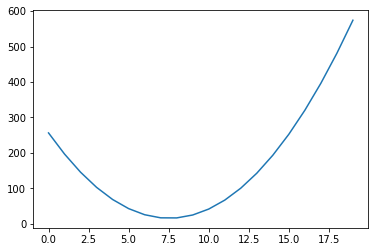

In [4]:
#illustrating regularization:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = 2
y_predicted = 20
b0 = 4
alpha = .5

error_lst = []
for b1 in range(0, 20):
    error = (y_predicted - b1*x - b0)**2 + (alpha*b1)**2
    error_lst.append(error)
print(error_lst)

plt.plot(error_lst)

#### Pipelines!
_A quick aside_

* These are a nice wrapper around any objects that follow the sklearn class structure (ie. with .fit() and .transform())  
* http://queirozf.com/entries/scikit-learn-pipeline-examples

In [ ]:
from sklearn.pipeline import Pipeline

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)

**To Gridsearch or not to Gridsearch?**

**What is gridsearch?**
- It's a method to iteratively tune our model and see which are the best hyperparameter values for our model

**Why do we gridsearch?** 
- It lets us tune hyperparameters easily so we don't have to manually loop through hyperparameters

**What are some hyperparameters?**
- alpha/C - regularization
- k - number of neighbors for knn
- number of clusters - kmeans


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = param_grid = {
    'C':[0.01, 0.1, 1.0]
}

grid = GridSearchCV(LogisticRegression(), cv=3, param_grid=param_grid)
grid.fit(X_train,y_train)

preds = grid.predict_proba(X_test)

_Another quick aside on Pipelines!_

You can use pipelines AND GridsearchCV

In [ ]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# this is where you define the values for
# GridSearchCV to iterate over
param_grid = {
    'clf__C':[0.01,0.1,1.0]
}

# do 3-fold cross validation for each of the 6 possible
# combinations of the parameter values above
grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid)
grid.fit(X_train,y_train)

**To cross_validate or not to cross_validate?**

*Answer:* Always cross validate!

**What is cross_validation?**
- Another method of doing test train split

**Why do we do cross_validation?**
- So that we can see if our model is underfitted or overfitted
- Allows for better tuning before we use our test set. 


### 4. Score & Interpret your Results


**What is the metric we use to measure regression? How about classification?**

- Regressions - R2 score
- Classficiations - accuracy

**How do you interpret an R2 score?**
- R2 = .83 => "the model explains 83% of the variance in the data"
- Is that good or bad? => the closer to 1 the better
- In linear regressions, how do you interpret coefficients? How about rmse? 

**How do you interpret an accuracy score?**
- Accuracy = .90 => the model is correct 90% of the time
- Is that good or bad? Depends on the baseline!!

**What if you cross validated and your scores are all over the place?**
- That means your model is overfitted!
- What do you do then? - Go back to Step 5 - Feature Engineering!


**Check this page out:** http://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
#### Some of our supervised metrics

## Regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Classification 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

# Classification Loss Functions (for error)
from sklearn.metrics import log_loss, hinge_loss, hamming_loss

# We also have our confusion matrix, plots and reports
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve

### 6. Score & Predict on Test Set
**When should you bring in the test set?**
- Only when you're confident of your model i.e. your scores are consistent
- Score your test set, get the predictions, plot residuals or create confusion matrix
- **Remember that ANYTHING YOU DO TO YOUR TRAIN DATA, YOU WILL HAVE TO DO TO YOUR TEST DATA!!!**


### 7. Run your model on your entire dataset

Remember to think:

**1. Scripts**  
**2. Pipelines**